Output sampel yang sudah dilakukan grayscale

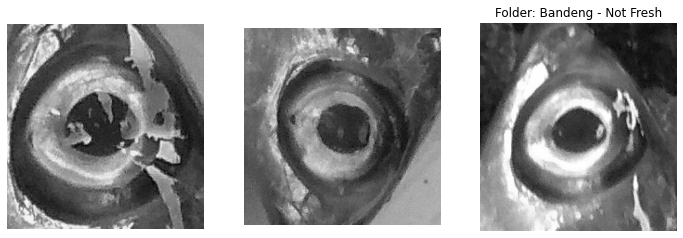

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

def display_images_horizontally(folder_paths, num_images=3):
    fig, axs = plt.subplots(1, num_images, figsize=(12, 4))

    for i, folder_path in enumerate(folder_paths):
        image_files = os.listdir(folder_path)
        num_images = min(num_images, len(image_files))

        for j in range(num_images):
            image_path = os.path.join(folder_path, image_files[j])
            grayscale_image = convert_to_grayscale(image_path)

            axs[j].imshow(grayscale_image, cmap='gray')
            axs[j].axis('off')

        axs[j].set_title(f"Folder: {os.path.basename(folder_path)}")

    plt.show()

# Memanggil fungsi display_images_horizontally dengan tiga folder yang berisi dataset gambar
folder_paths = ["E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengGrayScale\Bandeng - Fresh", "E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengGrayScale\Bandeng - Highly Fresh", "E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengGrayScale\Bandeng - Not Fresh"]
display_images_horizontally(folder_paths, num_images=3)

Cropping pada dataset Bandeng dan Sampel Outputnya

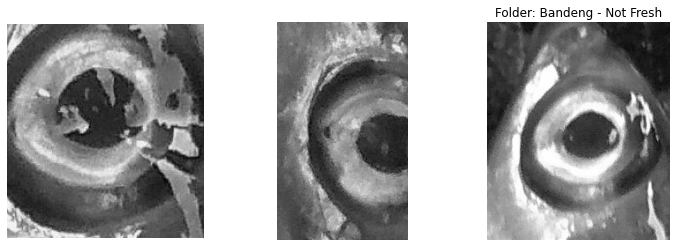

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

def crop_eye(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Mencari kontur dengan area terbesar (mata ikan)
    largest_contour = max(contours, key=cv2.contourArea)

    # Membuat bounding box untuk kontur mata ikan
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Memotong gambar dengan bounding box
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

def display_images_horizontally(folder_paths, num_images=3):
    fig, axs = plt.subplots(1, num_images, figsize=(12, 4))

    for i, folder_path in enumerate(folder_paths):
        image_files = os.listdir(folder_path)
        num_images = min(num_images, len(image_files))

        for j in range(num_images):
            image_path = os.path.join(folder_path, image_files[j])
            cropped_image = crop_eye(image_path)

            axs[j].imshow(cropped_image, cmap='gray')
            axs[j].axis('off')

        axs[j].set_title(f"Folder: {os.path.basename(folder_path)}")

    plt.show()

# Memanggil fungsi display_images_horizontally dengan tiga folder yang berisi dataset mata ikan yang sudah diubah ke skala keabuan (grayscale)
folder_paths = ["E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengCropping\Bandeng - Fresh", "E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengCropping\Bandeng - Highly Fresh", "E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengCropping\Bandeng - Not Fresh"]
display_images_horizontally(folder_paths, num_images=3)

Noise Filtering setelah Cropping

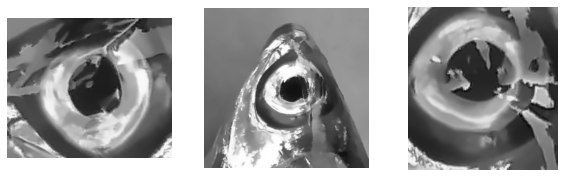

In [25]:
import cv2
import os
import matplotlib.pyplot as plt

def denoise_image(image):
    # Ubah gambar menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Terapkan filter denoising
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    
    return denoised

def display_images(images):
    fig = plt.figure(figsize=(10, 3))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

# Daftar folder dataset
folders = ['E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengCropping\Bandeng - Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengCropping\Bandeng - Highly Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengCropping\Bandeng - Not Fresh']

# Ambil 1 gambar dari setiap folder
images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:
        # Baca gambar
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        # Terapkan denoising pada gambar
        denoised_image = denoise_image(image)
        
        images.append(denoised_image)

# Tampilkan gambar secara horizontal di dalam text editor
display_images(images)

Sharpening setelah dilakukan Noise Filtering

In [28]:
import cv2
import os
import numpy as np

def sharpen_image(image):
    # Buat kernel sharpening
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    # Terapkan operasi filter sharpening
    sharpened = cv2.filter2D(image, -1, kernel)
    
    return sharpened

# Lokasi folder dataset mata ikan
input_folder = 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Not Fresh'

# Lokasi folder untuk menyimpan hasil sharpening
output_folder = 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Not Fresh'

# Membuat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Ambil semua gambar dari folder input
image_files = os.listdir(input_folder)

# Proses sharpening pada setiap gambar
for image_file in image_files:
    # Baca gambar
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    # Ubah gambar menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Terapkan sharpening pada gambar
    sharpened_image = sharpen_image(gray)
    
    # Simpan gambar hasil sharpening ke folder output
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, sharpened_image)

print("Proses sharpening selesai. Hasil gambar tersimpan di folder output.")

Proses sharpening selesai. Hasil gambar tersimpan di folder output.


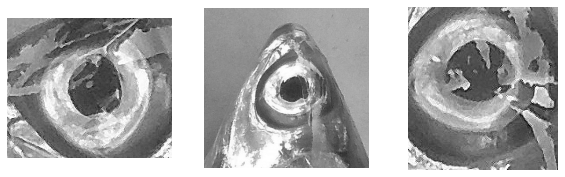

In [30]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def sharpen_image(image):
    # Buat kernel sharpening
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    # Terapkan operasi filter sharpening
    sharpened = cv2.filter2D(image, -1, kernel)
    
    return sharpened

def display_images(images):
    fig = plt.figure(figsize=(10, 3))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

# Daftar folder dataset
folders = ['E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Highly Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengNoiseFiltering\Bandeng - Not Fresh']

# Ambil 1 gambar dari setiap folder
images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:
        # Baca gambar
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        # Terapkan sharpening pada gambar
        sharpened_image = sharpen_image(image)
        
        images.append(sharpened_image)

# Tampilkan gambar secara horizontal di dalam text editor
display_images(images)


Ekualisasi histogram setelah sharpening, dilakukan untuk memperterang citra

In [36]:
import cv2
import os

def histogram_equalization(image):
    # Ubah gambar menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Terapkan ekualisasi histogram
    equalized = cv2.equalizeHist(gray)
    
    return equalized

# Lokasi folder dataset mata ikan
input_folder = 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Not Fresh'

# Lokasi folder untuk menyimpan hasil ekualisasi histogram
output_folder = 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Not Fresh'

# Membuat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Ambil semua gambar dari folder input
image_files = os.listdir(input_folder)

# Proses ekualisasi histogram pada setiap gambar
for image_file in image_files:
    # Baca gambar
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    # Terapkan ekualisasi histogram pada gambar
    equalized_image = histogram_equalization(image)
    
    # Simpan gambar hasil ekualisasi histogram ke folder output
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, equalized_image)

print("Proses ekualisasi histogram selesai. Hasil gambar tersimpan di folder output.")

Proses ekualisasi histogram selesai. Hasil gambar tersimpan di folder output.


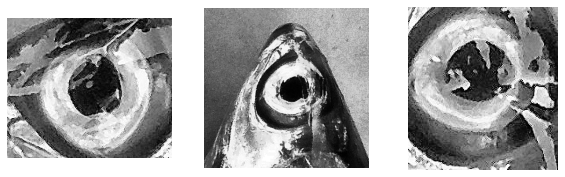

In [37]:
import cv2
import os
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Ubah gambar menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Terapkan ekualisasi histogram
    equalized = cv2.equalizeHist(gray)
    
    return equalized

def display_images(images):
    fig = plt.figure(figsize=(10, 3))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

# Daftar folder dataset
folders = ['E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Highly Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Not Fresh']

# Ambil 1 gambar dari setiap folder
images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:
        # Baca gambar
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        # Terapkan ekualisasi histogram pada gambar
        equalized_image = histogram_equalization(image)
        
        images.append(equalized_image)

# Tampilkan gambar secara horizontal di dalam text editor
display_images(images)


Setelah dilakukan ekualisasi histogram dilakukan edge detection

In [40]:
import cv2
import os

def detect_edges(image):
    # Ubah gambar menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Terapkan Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    return edges

# Lokasi folder dataset mata ikan
input_folder = 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengEkualisasiHistogram\Bandeng - Not Fresh'

# Lokasi folder untuk menyimpan hasil edge detection
output_folder = 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengEdgeDetection\Bandeng - Not Fresh'

# Membuat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Ambil semua gambar dari folder input
image_files = os.listdir(input_folder)

# Proses edge detection pada setiap gambar
for image_file in image_files:
    # Baca gambar
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    # Terapkan edge detection pada gambar
    edges = detect_edges(image)
    
    # Simpan gambar hasil edge detection ke folder output
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, edges)

print("Proses edge detection selesai. Hasil gambar tersimpan di folder output.")


Proses edge detection selesai. Hasil gambar tersimpan di folder output.


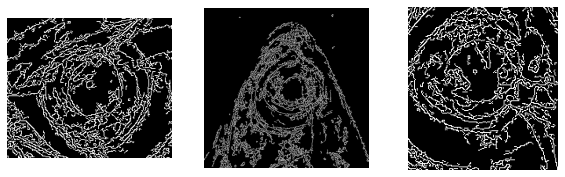

In [41]:
import cv2
import os
import matplotlib.pyplot as plt

def edge_detection(image):
    # Ubah gambar menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Terapkan Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    return edges

def display_images(images):
    fig = plt.figure(figsize=(10, 3))
    
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.show()

# Daftar folder dataset
folders = ['E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Highly Fresh', 'E:\Kuliah\SEMESTER VI\Pengolahan Citra Digital\Tubes1\DatasetBandengSharpening\Bandeng - Not Fresh']

# Ambil 1 gambar dari setiap folder
images = []

for folder in folders:
    image_files = os.listdir(folder)[:1]
    
    for image_file in image_files:
        # Baca gambar
        image_path = os.path.join(folder, image_file)
        image = cv2.imread(image_path)
        
        # Terapkan edge detection pada gambar
        edges = edge_detection(image)
        
        images.append(edges)

# Tampilkan gambar secara horizontal di dalam text editor
display_images(images)